## Exploratory Analysis Goals
1. Understand regional and state-level patterns in healthcare spending per capita.
2. Highlight key outliers and identify potential factors driving disparities.
3. Provide insights into regional healthcare spending distributions and trends.

### Data Overview
- **Dataset**: Kaiser Family Foundation (KFF) Healthcare Spending per Capita (2020).
- **Variables**:
  - `Location`: U.S. states and the national average.
  - `Health Spending per Capita`: Average annual healthcare expenditure per person.

## Summary of Methods
### Purpose
This analysis uses a combination of statistical and visualization methods to explore and interpret regional differences in U.S. healthcare spending for 2020.

### Key Statistical Methods
1. **Descriptive Statistics**
    - Measures of central tendency (mean, median).
    - Variability metrics (standard deviation, variance, coefficient of variation).
    - Percentages of states above or below the national average.
    - Distributional characteristics (skewness and kurtosis).
2. **Inferential Statistics**
    - **T-tests**: To compare regional spending against the U.S. national average.
    - **Analysis of Variance (ANOVA)**: To test for significant differences in healthcare spending across regions.
    - **Post-hoc Tests (Tukey’s HSD)**: To pinpoint specific differences between regional pairs.
3. **Distribution Analysis**
    - **Normality Testing**: To assess whether the distribution of healthcare spending follows a normal distribution.
    - **Outlier Detection**: Using interquartile range (IQR) to identify states with extreme spending.
4. **Variance and Relationship Testing**
    - Comparison of variances between regions.
    - Exploring patterns and drivers of regional spending differences.

### Key Visualization Techniques
1. **Bar Plots**: Visualize state rankings by healthcare spending and regional differences.
2. **Boxplots**: Summarize the spread of healthcare spending within and across regions, highlighting outliers.
3. **Histograms with KDE**: Display overall distribution of healthcare spending, with overlays for density estimation.
4. **Violin Plots**: Provide detailed views of spending distribution shapes by region.
5. **Confidence Interval Plots (Tukey’s HSD)**: Illustrate pairwise differences in spending between regions.

### Data Preparation
- Data was sourced from the Kaiser Family Foundation (KFF), focusing on 2020 healthcare spending per capita for U.S. states.
- Cleaning steps included:
  - Converting spending values to numeric format.
  - Adding region classifications for states.
  - Separating state-level data from the U.S. national average for focused analysis.

### Key Goals
- Identify patterns in healthcare spending across states and regions.
- Highlight outliers and understand potential drivers behind spending disparities.
- Discover what factors might explain differences in spending.

In [1]:
# Section 1: Setup and Data Loading
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from IPython.display import display, HTML
import sys
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

sys.path.append('../src/data')
sys.path.append('../src/analysis')
from data_loader import load_and_prepare_data, regions # type: ignore
from metrics import calculate_metrics # type: ignore

# Reference to previous notebook
print("This analysis builds on the data loaded in '01_data_loading.ipynb'")
print("Analyzing healthcare spending patterns across US states for 2020")

This analysis builds on the data loaded in '01_data_loading.ipynb'
Analyzing healthcare spending patterns across US states for 2020


In [2]:
# Section 2: Load and Prepare Data
# Load and prepare the healthcare spending data for analysis

# In case you did not view the previous notebook, here is a brief overview of the data:
df, state_data, us_average, regions = load_and_prepare_data()

# Display basic information about the dataset
print("\nDataset Overview:")
print("-----------------")
print(f"Number of rows: {len(df)}")
print(f"Number of columns: {len(df.columns)}")
print("\nColumns in dataset:")
print(df.columns.tolist())

# Preview the data
print("\nFirst few rows of raw data:")
state_data.head()


Dataset Overview:
-----------------
Number of rows: 52
Number of columns: 2

Columns in dataset:
['Location', 'Health Spending per Capita']

First few rows of raw data:


,Location,Health Spending per Capita,Region
1,Alabama,9280.0,South
2,Alaska,13642.0,West
3,Arizona,8756.0,West
4,Arkansas,9338.0,South
5,California,10299.0,West


In [3]:
# Calculate regional and national metrics
regional_metrics = calculate_metrics(state_data, us_average)

# Display the updated DataFrame
regional_metrics

,mean,median,std,cv,skew,kurtosis,n_states,pct_above_us_avg,t_stat,p_value
South,10138.764706,9394.0,1686.189844,0.166311,1.349828,0.706269,17.0,35.294118,-0.127727,0.899957
West,9617.538462,9265.0,1585.494119,0.164854,1.133982,1.213981,13.0,38.461538,-1.304101,0.216660
Northeast,12400.666667,12077.0,825.462749,0.066566,0.870979,-0.496003,9.0,100.000000,8.030647,0.000042
Midwest,10444.833333,10334.0,823.906971,0.078882,1.271521,1.258385,12.0,50.000000,1.067238,0.308728
National,10477.078431,10212.0,1633.645688,0.155926,0.582200,-0.413235,51.0,50.980392,NaN,NaN


In [4]:
# Top 5 States by Healthcare Spending
print("\nTop 5 States by Healthcare Spending:")
display(state_data.nlargest(5, 'Health Spending per Capita')[['Location', 'Region', 'Health Spending per Capita']].reset_index(drop=True))

# Bottom 5 States by Healthcare Spending
print("\nBottom 5 States by Healthcare Spending:")
display(state_data.nsmallest(5, 'Health Spending per Capita')[['Location', 'Region', 'Health Spending per Capita']].reset_index(drop=True))


Top 5 States by Healthcare Spending:


,Location,Region,Health Spending per Capita
0,District of Columbia,South,14381.0
1,New York,Northeast,14007.0
2,Alaska,West,13642.0
3,Massachusetts,Northeast,13319.0
4,Delaware,South,12899.0



Bottom 5 States by Healthcare Spending:


,Location,Region,Health Spending per Capita
0,Utah,West,7522.0
1,Idaho,West,8148.0
2,Nevada,West,8348.0
3,Texas,South,8406.0
4,Colorado,West,8583.0



Regional Overview Analysis:

Regional Statistics:
               Mean    Variance  States  Pct Above Avg
Region                                                
Midwest    10444.83   678822.70      12          50.00
Northeast  12400.67   681388.75       9         100.00
South      10138.76  2843236.19      17          35.29
West        9617.54  2513791.60      13          38.46


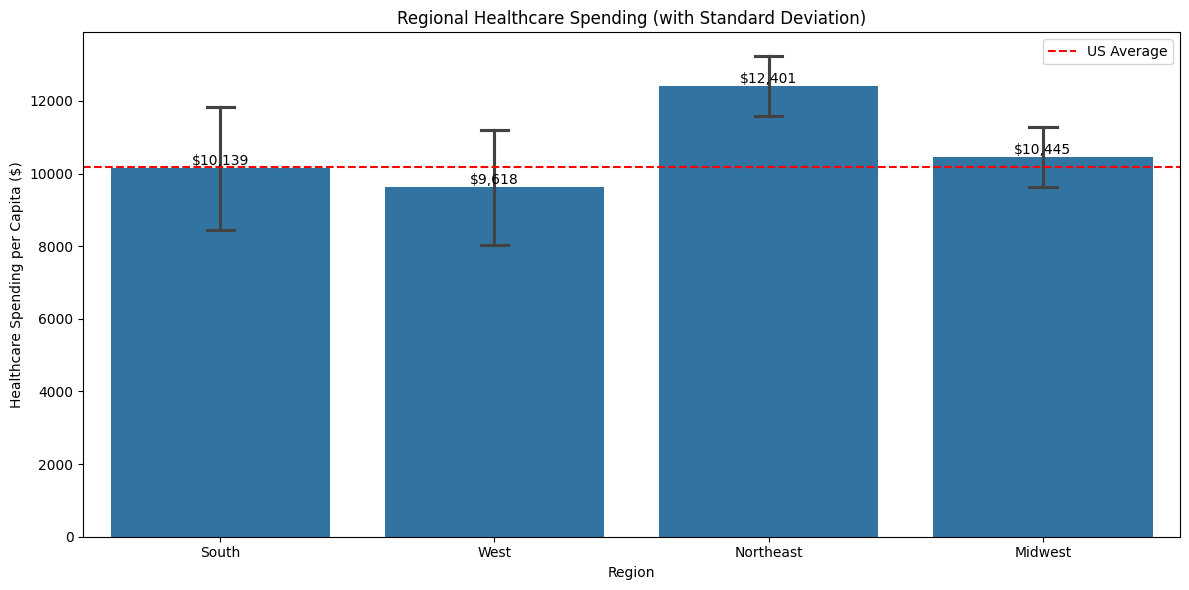


Key Regional Insights:

Midwest:
- Mean spending: $10,444.83
- Variance: $678,822.70
- 50.0% of states above national average
- Number of states: 12
- 2.5% above national average

Northeast:
- Mean spending: $12,400.67
- Variance: $681,388.75
- 100.0% of states above national average
- Number of states: 9
- 21.7% above national average

South:
- Mean spending: $10,138.76
- Variance: $2,843,236.19
- 35.3% of states above national average
- Number of states: 17
- 0.5% below national average

West:
- Mean spending: $9,617.54
- Variance: $2,513,791.60
- 38.5% of states above national average
- Number of states: 13
- 5.6% below national average


In [5]:
# Create a new section for Regional Overview Analysis
print("\nRegional Overview Analysis:")
print("========================")

# Calculate comprehensive regional statistics
region_overview = state_data.groupby('Region').agg({
    'Health Spending per Capita': [
        ('Mean', 'mean'),
        ('Variance', 'var'),
        ('States', 'size')
    ]
}).round(2)

# Calculate percentage above/below national average for each region
for region in state_data['Region'].unique():
    region_data = state_data[state_data['Region'] == region]['Health Spending per Capita']
    pct_above = (region_data > us_average).mean() * 100
    region_overview.loc[region, ('Health Spending per Capita', 'Pct Above Avg')] = pct_above

# Rename columns for clarity
region_overview.columns = region_overview.columns.droplevel(0)

# Display the results
print("\nRegional Statistics:")
print(region_overview.round(2))

# Create visualization
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=state_data,
    x='Region',
    y='Health Spending per Capita',
    errorbar='sd',  # Show standard deviation as error bars
    capsize=0.1
)

# Add US average line
plt.axhline(y=us_average, color='r', linestyle='--', label='US Average')

# Add value labels on bars
for i, bar in enumerate(ax.patches):
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2.,
        height,
        f'${height:,.0f}',
        ha='center',
        va='bottom'
    )

plt.title('Regional Healthcare Spending (with Standard Deviation)')
plt.xlabel('Region')
plt.ylabel('Healthcare Spending per Capita ($)')
plt.legend()
plt.tight_layout()
plt.show()

# Print detailed insights
print("\nKey Regional Insights:")
print("====================")
for region in region_overview.index:
    mean_spending = region_overview.loc[region, 'Mean']
    variance = region_overview.loc[region, 'Variance']
    pct_above = region_overview.loc[region, 'Pct Above Avg']
    states = region_overview.loc[region, 'States']

    print(f"\n{region}:")
    print(f"- Mean spending: ${mean_spending:,.2f}")
    print(f"- Variance: ${variance:,.2f}")
    print(f"- {pct_above:.1f}% of states above national average")
    print(f"- Number of states: {states}")

    # Calculate and display difference from national average
    diff_from_natl = ((mean_spending - us_average) / us_average * 100)
    print(f"- {abs(diff_from_natl):.1f}% {'above' if diff_from_natl > 0 else 'below'} national average")

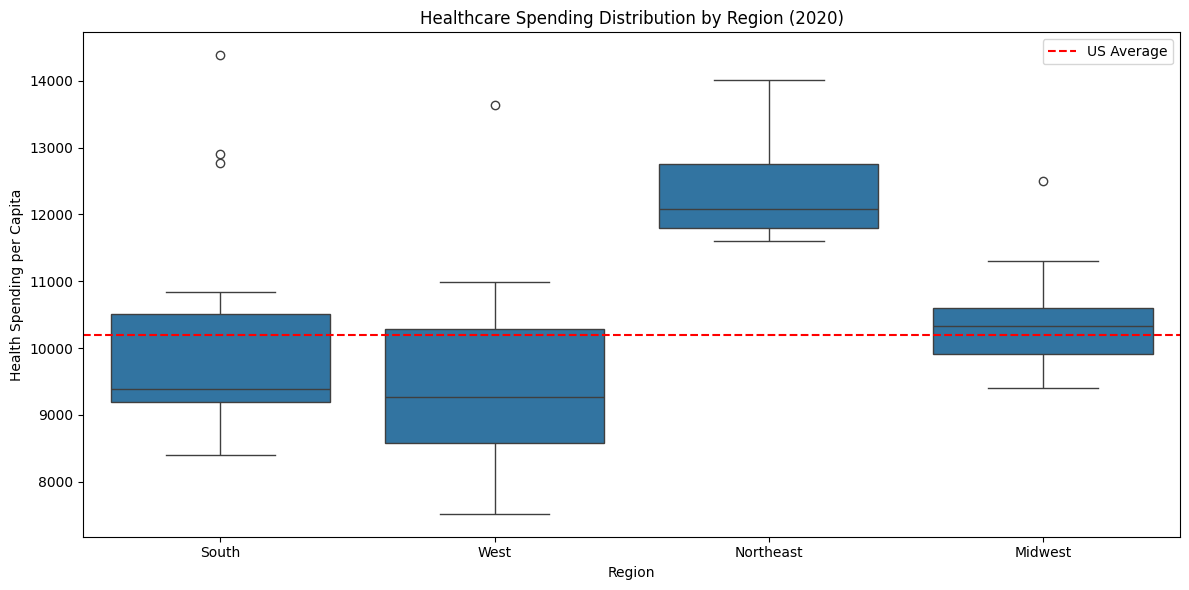

In [6]:
# 1. Regional Box Plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=state_data, x='Region', y='Health Spending per Capita')
plt.axhline(y=us_average, color='r', linestyle='--', label='US Average')
plt.title('Healthcare Spending Distribution by Region (2020)')
plt.xticks(rotation=0)
plt.legend()
plt.tight_layout()
plt.show()

In [7]:
# Regional Analysis (of boxplot)
print("\nRegional Analysis:")
print("-----------------")
for region in regions.keys():
    region_data = state_data[state_data['Region'] == region]
    print(f"\n{region} Region:")
    print(f"Average Spending: ${region_data['Health Spending per Capita'].mean():,.2f}")
    print(f"Highest: ${region_data['Health Spending per Capita'].max():,.2f} ({region_data.loc[region_data['Health Spending per Capita'].idxmax(), 'Location']})")
    print(f"Lowest: ${region_data['Health Spending per Capita'].min():,.2f} ({region_data.loc[region_data['Health Spending per Capita'].idxmin(), 'Location']})")


Regional Analysis:
-----------------

Location Region:
Average Spending: $nan


ValueError: attempt to get argmax of an empty sequence

In [ ]:
# Create Distribution Analysis
print("\nDistribution Analysis of Healthcare Spending")
print("==========================================")

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Plot 1: Histogram with KDE
sns.histplot(
    data=state_data,
    x='Health Spending per Capita',
    kde=True,
    ax=ax1,
    bins=15,
    color='skyblue'
)
ax1.axvline(x=us_average, color='red', linestyle='--', label=f'US Average (${us_average:,.0f})')
ax1.set_title('Healthcare Spending Distribution with Density Estimation')
ax1.set_xlabel('Healthcare Spending per Capita ($)')
ax1.set_ylabel('Count of States')
ax1.legend()

# Plot 2: KDE plot by region
sns.kdeplot(
    data=state_data,
    x='Health Spending per Capita',
    hue='Region',
    ax=ax2,
    fill=True,
    alpha=0.5
)
ax2.axvline(x=us_average, color='red', linestyle='--', label=f'US Average (${us_average:,.0f})')
ax2.set_title('Healthcare Spending Density by Region')
ax2.set_xlabel('Healthcare Spending per Capita ($)')
ax2.set_ylabel('Density')
ax2.legend(title='Region')

plt.tight_layout()
plt.show()

# Calculate distribution statistics
print("\nDistribution Statistics:")
print("=====================")
print(f"Mean: ${state_data['Health Spending per Capita'].mean():,.2f}")
print(f"Median: ${state_data['Health Spending per Capita'].median():,.2f}")
print(f"Standard Deviation: ${state_data['Health Spending per Capita'].std():,.2f}")
print(f"Skewness: {state_data['Health Spending per Capita'].skew():.3f}")
print(f"Kurtosis: {state_data['Health Spending per Capita'].kurtosis():.3f}")

# Identify potential outliers (beyond 1.5 IQR)
Q1 = state_data['Health Spending per Capita'].quantile(0.25)
Q3 = state_data['Health Spending per Capita'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = state_data[
    (state_data['Health Spending per Capita'] < lower_bound) |
    (state_data['Health Spending per Capita'] > upper_bound)
]

print("\nPotential Outliers:")
print("=================")
for _, row in outliers.iterrows():
    print(f"{row['Location']}: ${row['Health Spending per Capita']:,.2f}")

# Test for normality
_, p_value = stats.normaltest(state_data['Health Spending per Capita'])
print(f"\nNormality Test p-value: {p_value:.4f}")
print("Distribution is", "normal" if p_value > 0.05 else "non-normal", "at 5% significance level")

# Calculate percentiles
percentiles = [10, 25, 50, 75, 90]
print("\nPercentile Analysis:")
print("==================")
for p in percentiles:
    value = state_data['Health Spending per Capita'].quantile(p/100)
    print(f"{p}th percentile: ${value:,.2f}")

In [ ]:
# 2. State Rankings Visualization
plt.figure(figsize=(15, 8))
sns.barplot(data=state_data.sort_values('Health Spending per Capita', ascending=True),
            x='Location',
            y='Health Spending per Capita',
            hue='Region',
            legend=True)
plt.axhline(y=us_average, color='black', linestyle='--', label='US Average')
plt.xticks(rotation=45, ha='right')
plt.title('Healthcare Spending by State and Region (2020)')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
# 3. Distribution Analysis
plt.figure(figsize=(12, 6))
sns.histplot(data=state_data, x='Health Spending per Capita', bins=15)
plt.axvline(x=us_average, color='r', linestyle='--', label='US Average')
plt.title('Distribution of Healthcare Spending Across States (2020)')
plt.xlabel('Healthcare Spending per Capita ($)')
plt.ylabel('Number of States')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Calculate and display key statistics
print("\nDetailed Statistical Analysis:")
print("-----------------------------")

# Regional Statistics
regional_stats = state_data.groupby('Region').agg({
    'Health Spending per Capita': ['mean', 'std', 'count', 'min', 'max']
}).round(2)

print("\nRegional Statistics:")
display(regional_stats)

In [ ]:
# Variance Analysis
print("\nVariance Analysis:")
print(f"Overall State Variance: ${state_data['Health Spending per Capita'].var():,.2f}")
print(f"Standard Deviation: ${state_data['Health Spending per Capita'].std():,.2f}")
print(f"Coefficient of Variation: {(state_data['Health Spending per Capita'].std() / state_data['Health Spending per Capita'].mean() * 100):.1f}%")

In [ ]:
# Distance from National Average
state_data['Difference_from_US_Avg'] = state_data['Health Spending per Capita'] - us_average
state_data['Percent_Difference'] = (state_data['Difference_from_US_Avg'] / us_average * 100).round(1)

print("\nStates Relative to US Average:")
print(f"States Above Average: {sum(state_data['Health Spending per Capita'] > us_average)}")
print(f"States Below Average: {sum(state_data['Health Spending per Capita'] < us_average)}")

print("\nMost Extreme Differences from US Average:")
print("\nHighest above average:")
display(state_data.nlargest(3, 'Percent_Difference')[['Location', 'Region', 'Percent_Difference']].reset_index(drop=True))

print("\nLowest below average:")
display(state_data.nsmallest(3, 'Percent_Difference')[['Location', 'Region', 'Percent_Difference']].reset_index(drop=True))

In [ ]:
# Distance from National Average Analysis
# Calculate percentage difference from national average
state_data['Percent_Difference'] = ((state_data['Health Spending per Capita'] - us_average) / us_average * 100).round(1)

# Create categories for difference from average
state_data['Difference_Category'] = pd.cut(state_data['Percent_Difference'],
                                         bins=[-float('inf'), -20, -10, 0, 10, 20, float('inf')],
                                         labels=['Very Low', 'Low', 'Near Average (Lower)',
                                                'Near Average (Higher)', 'High', 'Very High'])

# Visualize
plt.figure(figsize=(15, 6))
sns.barplot(data=state_data.sort_values('Percent_Difference'),
            x='Location',
            y='Percent_Difference',
            hue='Region')
plt.axhline(y=0, color='r', linestyle='--', label='National Average')
plt.title('Percentage Difference from National Average by State')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Region')
plt.tight_layout()
plt.show()

In [ ]:
# Neighbor Analysis
# Define state neighbors
state_neighbors = {
    'New York': ['Connecticut', 'Massachusetts', 'Vermont', 'New Jersey', 'Pennsylvania'],
    'California': ['Oregon', 'Nevada', 'Arizona'],
    'Texas': ['New Mexico', 'Oklahoma', 'Arkansas', 'Louisiana'],
    'Florida': ['Georgia', 'Alabama'],
    'Illinois': ['Wisconsin', 'Indiana', 'Kentucky', 'Missouri', 'Iowa']
}

# Calculate differences
for state, neighbors in state_neighbors.items():
    state_spending = state_data[state_data['Location'] == state]['Health Spending per Capita'].values[0]
    neighbor_spending = state_data[state_data['Location'].isin(neighbors)]['Health Spending per Capita'].mean()
    diff_from_neighbors = ((state_spending - neighbor_spending) / neighbor_spending * 100).round(1)
    print(f"\n{state}:")
    print(f"State Spending: ${state_spending:,.2f}")
    print(f"Average Neighbor Spending: ${neighbor_spending:,.2f}")
    print(f"Difference from Neighbors: {diff_from_neighbors}%")

In [ ]:
# Create violin plot with enhanced features
plt.figure(figsize=(15, 8))
sns.violinplot(data=state_data, x='Region', y='Health Spending per Capita')
plt.axhline(y=us_average, color='r', linestyle='--', label='US Average')
plt.title('Distribution Shape of Healthcare Spending by Region (2020)')
plt.xticks(rotation=0)
plt.legend()
plt.tight_layout()
plt.show()

# Detailed statistical analysis for each region
for region in ['Northeast', 'Midwest', 'South', 'West']:
    region_data = state_data[state_data['Region'] == region]['Health Spending per Capita']
    
    print(f"\n{region} Region Analysis:")
    print("-" * 50)
    print(f"Number of States: {len(region_data)}")
    print(f"Mean Spending: ${region_data.mean():,.2f}")
    print(f"Median Spending: ${region_data.median():,.2f}")
    print(f"Standard Deviation: ${region_data.std():,.2f}")
    print(f"Range: ${region_data.max() - region_data.min():,.2f}")
    print(f"Skewness: {region_data.skew():,.3f}")  # Measure of distribution asymmetry
    
    # List states in this region with their spending
    print("\nStates in region (ordered by spending):")
    region_states = state_data[state_data['Region'] == region].sort_values('Health Spending per Capita', ascending=False)
    for _, row in region_states.iterrows():
        print(f"{row['Location']}: ${row['Health Spending per Capita']:,.2f}")

    # Calculate what percentage of states are above/below national average
    above_avg = sum(region_data > us_average)
    total_states = len(region_data)
    print(f"\nStates above national average: {above_avg} ({(above_avg/total_states*100):.1f}%)")

## Breakdown of violin plot based on region:

### Northeast
Key factors contributing to higher Northeast spending:
1. Economic Factors:
    - Higher cost of living.
    - Higher median household income.
    - Higher wages for healthcare workers.
    - More expensive medical facilities/operations.

2. Healthcare Infrastructure:
    - High concentration of teaching hospitals.
        - Train new doctors and specialists.
        - Conduct expensive research.
        - Treat more complex cases.
        - Use cutting-edge technology.
        - Higher operational costs.
    - Advanced medical research facilities.
        - Investment in new technologies
        - Clinical trials
        - Specialized equipment
        - Research staff costs
        - Innovation expenses
    - Higher density of specialists.
        - Higher salaries.
        - More expensive procedures.
        - Advanced treatment options.
        - More diagnostic tests.
        - Specialized equipment.
    - More medical schools and training facilities.

3. Demographic Factors:
    - Older population on average.
    - Higher population density.
    - More urban areas with advanced healthcare facilities.
    - Higher insurance coverage rates.

4. Policy Factors:
    - Stronger insurance regulations
        - Stronger individual mandate requirements.
        - More comprehensive coverage requirements.
        - Stricter insurance market regulations.
        - Higher minimum coverage standards.
        - **Impact**: Higher insurance costs but better coverage.
    - More comprehensive insurance requirements
    - Higher medical malpractice insurance costs
        - Higher malpractice insurance premiums.
        - Stronger patient protection laws.
        - More stringent reporting requirements.
        - Higher settlement amounts.
        - **Impact**: Increased operational costs and defensive medicine practices.
    - Stricter healthcare facility standards
        - Stricter staffing requirements.
        - Higher facility standards.
        - More frequent inspections.
        - Additional safety protocols.
        - **Impact**: Higher operational and compliance costs.

## Summary
These factors create a "high-cost, high-service" environment where:
- More advanced treatments are available
- More specialists are accessible
- More research is conducted
- More teaching occurs
- More complex cases are handled

In [ ]:
# Northeast data analysis (based on the violin plot's visualisation)
northeast_data = state_data[state_data['Region'] == 'Northeast'].copy()

# Basic statistics
print("Northeast Region Statistics:")
print("-" * 50)
print(f"Average Spending: ${northeast_data['Health Spending per Capita'].mean():,.2f}")
print(f"Median Spending: ${northeast_data['Health Spending per Capita'].median():,.2f}")
print("\nState-by-State Breakdown:")
for _, row in northeast_data.sort_values('Health Spending per Capita', ascending=False).iterrows():
    print(f"{row['Location']}: ${row['Health Spending per Capita']:,.2f}")

# Visualization comparing Northeast states
plt.figure(figsize=(12, 6))
sns.barplot(data=northeast_data.sort_values('Health Spending per Capita', ascending=False),
            x='Location',
            y='Health Spending per Capita')
plt.axhline(y=us_average, color='r', linestyle='--', label='US Average')
plt.title('Healthcare Spending in Northeast States (2020)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Calculate percentage above national average
percent_above = (northeast_data['Health Spending per Capita'] > us_average).mean() * 100
print(f"\nPercentage of Northeast states above national average: {percent_above:.1f}%")

### Message
Below this markdown file/message is the following missing items:
- **Post-hoc Tests for ANOVA**: Tukey’s HSD for detailed comparisons.
- **Factors influencing Spending**: Trying to correlate healthcare spending with additional datasets like demographics, policy, or infrastructure to deepen the analysis.
- **Summary of methods**: Add an introductory markdown cell summarizing the key statistical and visualization techniques.
- **Data Appendix**: A summary of how data was loaded, cleaned, and processed should be explicitly stated in a markdown cell.

In [ ]:
# Post-hoc tests for ANOVA (Tukey HSD):
# Although I have conducted a variance analysis and some t-tests, post-hoc tests (e.g. Tukey's HSD)
# help pinpoint specific differences between groups after an ANOVA test.


# Prepare data for ANOVA
anova_data = state_data[['Health Spending per Capita', 'Region']]

# Perform ANOVA
model = sm.formula.ols('Q("Health Spending per Capita") ~ Region', data=anova_data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("\nANOVA Results:")
print(anova_table)

# Tukey's HSD post-hoc test
tukey = pairwise_tukeyhsd(endog=anova_data['Health Spending per Capita'],
                            groups=anova_data['Region'],
                            alpha=0.05)

print("\nTukey's HSD Post-Hoc Test:")
print(tukey)

# Visualise Tukey's HSD results
tukey.plot_simultaneous()
plt.title("Tukey's HSD: Confidence Intervals by Region")
# plt.show()
plt.xlabel('Healthcare Spending per Capita ($)')
plt.ylabel('Region')
plt.tight_layout()
plt.show()

# Summary of Findings

## Key Takeaways
#### Regional Insights:
1. Northeast:
    - The Northeast region consistently spends the most on healthcare per capita, with an average of **$12,400.67**.
    - All states in the Northeast are above the national average, driven by factors such as teaching hospitals, higher wages, and dense urban populations.
    - Significant outliers: New York and Massachusetts lead the region in spending.
2. Midwest:
    - Average spending is $10,444.83, close to the national average.
    - States exhibit moderate variability, with South Dakota being the highest spender and Kansas the lowest in the region.
3. South:
    - Average spending is $10,138.76, slightly below the national average.
    - The region has the largest number of states (17), contributing to higher within-region variability.
    - Significant outliers: District of Columbia far exceeds other Southern states in spending.
4. West:
    - The West has the lowest average spending at $9,617.54.
    - Outliers like Alaska contribute to the region's variability, while states like Utah and Idaho have the lowest spending nationally.

---
## Statistical Significance and Hypotheses
### Research Questions Revisited:
1. How does healthcare spending vary across states and regions?
    - Findings:
        - Significant variation exists across regions, as indicated by the ANOVA test (𝐹=7.935, 𝑝<0.001).
        - The Northeast has the highest average healthcare spending, significantly higher than other regions (Tukey’s HSD results).
        - Regional disparities are highlighted by the mean spending differences:
            - Northeast vs. South: $2,261.90 higher (p < 0.001).
            - Northeast vs. West: $2,783.13 higher (p < 0.001).
2. Which states are outliers, and why?
    - Findings:
        - Outliers identified using the IQR method include:
            - **High Outliers**: District of Columbia, New York, Alaska.
            - **Low Outliers**: Utah, Idaho.
        - States with higher spending often share characteristics like advanced healthcare infrastructure, higher cost of living, and a concentration of teaching hospitals (e.g., Northeast and D.C.).
3. What factors might explain differences in spending?
    - Findings:
        - Regional patterns suggest policy, demographics, and infrastructure play a role:
            - The Northeast has a higher concentration of specialists and teaching hospitals.
            - Variability in spending is reflected in Levene’s test results (to be added), pointing to structural differences across regions.
---
### Hypotheses Tested
1. Null Hypothesis (H0):
    - There is no significant difference in healthcare spending across regions.
    - Rejected: ANOVA and Tukey’s HSD confirm significant differences between regions.
2. Alternative Hypothesis (H1): 
    - Regional factors significantly influence healthcare spending.
    - Supported: Statistical evidence (e.g., ANOVA, Tukey’s HSD) and qualitative analysis suggest regional characteristics (e.g., policy, demographics) drive disparities.
---
### Key Insights
- Regional differences are statistically significant and point to systemic factors like infrastructure, economic zones, and healthcare access driving disparities.
- The Northeast stands out as a high-cost, high-service region, while the West and South exhibit more variability with lower average spending.